<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Project/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification
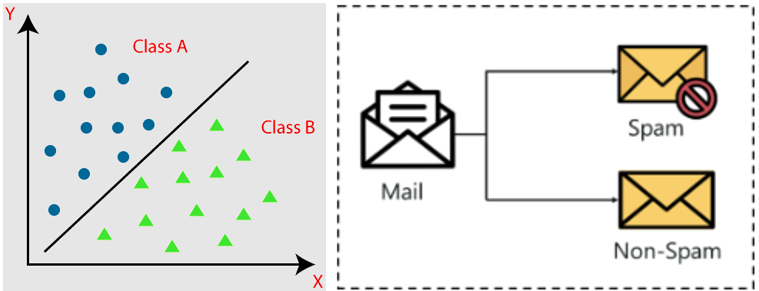

Classification is a predictive modelling problem in Machine Learning where a class Label is predicted for a given example of input data. In easier terms, it is basically classifying a given data or input set into a particular group, by using Statistical Principles. The spam detection algorithm of emails is a prime example of Classification.

In [26]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## MNIST
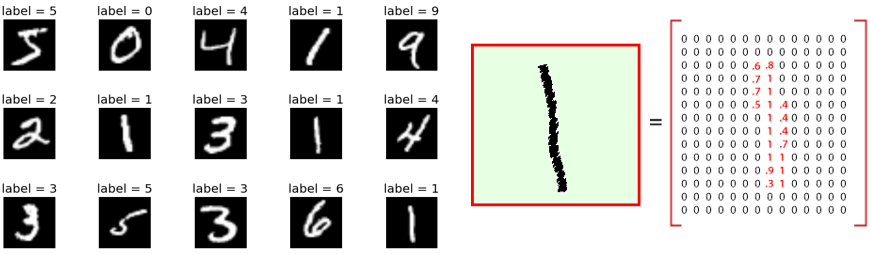

* MNIST is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. 
* Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning

### Loading the data
* Scikit-Learn provides many helper functions to download popular datasets. MNIST isone of them. 
* The following code fetches the MNIST dataset:
> fetch_openml("mnist_784", version=1)

In [1]:
from sklearn.datasets import fetch_openml
df = fetch_openml("mnist_784", version=1)

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A DESCR key describing the dataset
* A data key containing an array with one row per instance and one column per
feature
* A target key containing an array with the labels

In [2]:
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(df.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [9]:
#There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
#and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).
df.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Target tells us the actual number to which each handwriting image in df.data represting
df.target

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
# Let's assign the df.data and df.target to varialbels X, Y for our convenience
X = df.data.values
Y = df.target
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [20]:
# the target Y is by default a string. We prefer numbers, so let’s cast y to integers:
Y = Y.astype("int8")

### Viewing an Image
* Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels)
* Then, we plot the image and label with matplotlib
* **You can change the value of variable idx to check out other images and labels**

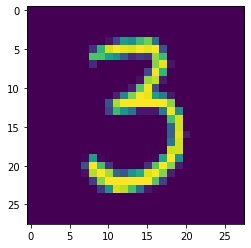

Target Value: 3


In [25]:
idx = 50
plt.imshow(X[idx].reshape(28,28))
plt.show()
print("Target Value:", Y[idx])

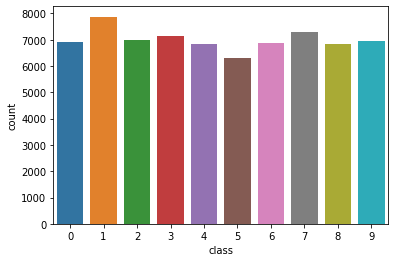

In [29]:
# Let's Count the how many times each number present in dataset
sns.countplot(x = Y)
plt.show()

* You should always create a test set and set it aside before inspecting the data
closely. 
* The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

# Training a Binary Classifier
* Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. 
* This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. 

In [31]:
# Let’s create the target vectors for this classification task
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

* Okay, now let’s pick a classifier and train it. 
* A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. 
* This classifier has the advantage of being capable of handling very large datasets efficiently.

In [32]:
# Create an SGDClassifier and train it on the whole training set
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

**NOTE** : The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

In [37]:
y_pred = sgd_clf.predict(X_test)
y_pred[1]

False

## Performance Measures

### **1. Measuring Accuracy**
* Accuracy is the number of correctly predicted data points out of all the data points.
> Accuracy = **Number of correct predictions** / **Total number of predictions**

In [46]:
score = y_pred == y_test                # correct prediction = True, incorrect prediction = False 
accuracy = score.sum() / y_pred.size    # score.sum() = count the total num of True (correct prediction)
print(accuracy)

0.0919


In [45]:
# We can also use sklearn to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.0919

* It has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.
* This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

### **2. Confusion Matrix**
* A much better way to evaluate the performance of a classifier is to look at the confusion matrix. 
* The general idea is to count the number of times instances of class A are classified as class B. 
* For example, to know the number of times the classifier confused
images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

> `confusion_matrix()` takes two arguments target classes` `(`y_train_5`) and the predicted classes (`y_pred`)

In [75]:
from sklearn import metrics

conf_mat = metrics.confusion_matrix(y_test_5, y_pred)
conf_mat

array([[8707,  401],
       [ 107,  785]])

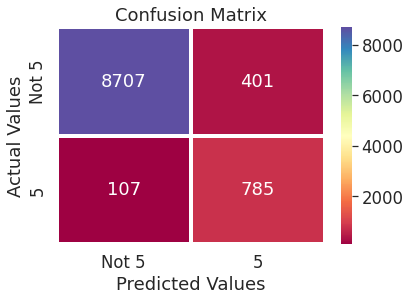

In [91]:
# Plot the confusion Matrix Result
ax = plt.axes()             # matplotlib axis obj
sns.set(font_scale=1.5)     # Increase Font size

sns.heatmap(conf_mat, annot = True, fmt="d", 
            xticklabels=["Not 5", "5"], 
            yticklabels=["Not 5", "5"], 
            ax = ax, linewidths = 3, cmap="Spectral")

ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix")
plt.show()